In [1]:
%matplotlib inline

import numpy as np
import tabulate as tb
import numpy.random as npr
import math
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/hofmann/nngame/package/src/rlbase/")

import env_blackjack
import policy
import agent_deterministic
import experiment_mc_everyvisit
import misc

# Figure 5.1
Approximate state-value functions for the blackjack policy that sticks only on 20 or 21, computed by Monte Carlo policy evaluation

In [2]:
env = env_blackjack.BlackjackEnvironment()
pi = policy.DeterministicPolicy(env.states,env.actions,{s:[s[0]<20] for s in env.states})
agent = agent_deterministic.DeterministicAgent()
agent.agent_init({"pi":pi})
ex = experiment_mc_everyvisit.MC_EveryVisitExperiment(env,agent)
ex.experiment_init({"n_episodes":500000})
ex.train()

100%|██████████| 500000/500000 [00:05<00:00, 93230.05it/s]


Text(0.5, 1.0, 'Usable ace')

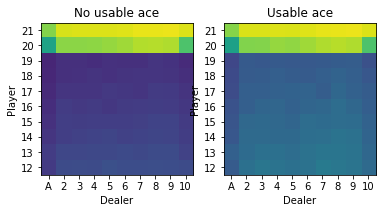

In [3]:
# Dealer-Label
dealer_label = ["A"]+list(range(2,11))

player, dealer = env.get_player_dealer()

# Plot
plt.figure()
arr = np.zeros((len(player),len(dealer),2))
for (ix,x) in enumerate(dealer):
  for (iy,y) in enumerate(player):
    for j in range(2):
      if x==11:
        arr[iy,0,j] = ex.V[(y,x,j)]
      else:
        arr[iy,ix+1,j] = ex.V[(y,x,j)]        
plt.subplot(1,2,1)
plt.imshow(arr[:,:,0],origin="lower",vmin=-1,vmax=1)
plt.xticks(range(len(dealer_label)),dealer_label)
plt.xlabel("Dealer")
plt.yticks(range(len(player)),player)
plt.ylabel("Player")
plt.title("No usable ace")
plt.subplot(1,2,2)
plt.imshow(arr[:,:,1],origin="lower",vmin=-1,vmax=1)
plt.xticks(range(len(dealer_label)),dealer_label)
plt.xlabel("Dealer")
plt.yticks(range(len(player)),player)
plt.ylabel("Player")
plt.title("Usable ace")